# Step functions
This notebook creates analytical implicit functions and adds a step function to them. The results indicate some possible issues that could happen when using step functions. You need:
* numpy
* matplotlib

In [1]:
import numpy as np
import matplotlib.pyplot as plt 

In [2]:
def create_fault_field(dip,x,y):
    v = np.zeros((len(x),len(y)))
    z = np.zeros((len(x),len(y)))

    for i in range(v.shape[0]):
        for j in range(v.shape[1]):
            v[i,j] = np.sin(np.deg2rad(dip))*(x[j]-np.min(x))+np.cos(np.deg2rad(dip))*(y[i]-np.min(y))
            z[i,j] = np.sin(np.deg2rad(-dip))*(x[j]-np.min(x))+np.cos(np.deg2rad(-dip))*(y[i]-np.min(y))
    return v,z
def fmt(x, y,Xflat,Yflat,Zflat):

    z = np.zeros(x.shape)
    for i in range(len(x)):
        for j in range(len(x)):
    # get closest point with known data
            dist = np.linalg.norm(np.vstack([Xflat - x[i,j], Yflat - y[i,j]]), axis=0)
            idx = np.argmin(dist)
            z[i,j] = Zflat[idx]
    return z

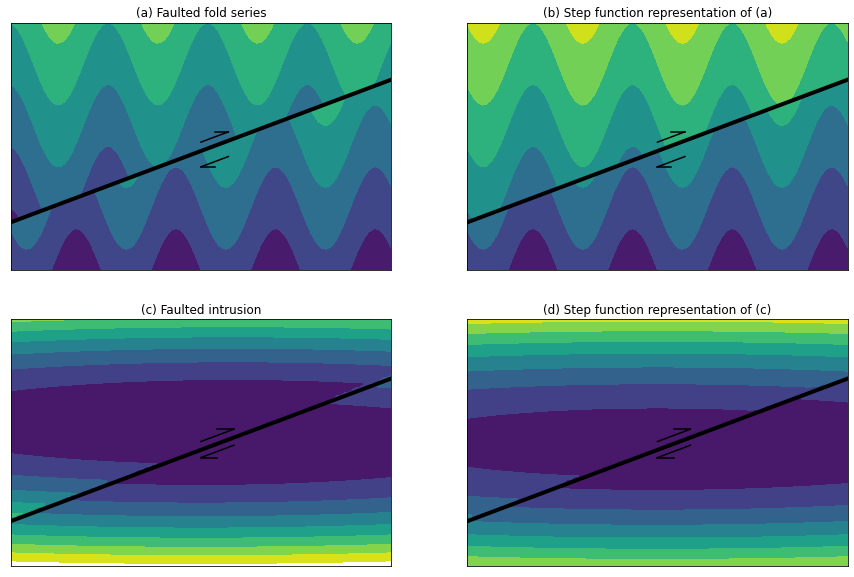

In [84]:
def slip_symbol_up(origin,ax, scale=1):
    ax.plot([origin[0],origin[0]+scale*np.sin(np.deg2rad(60))],[origin[1],origin[1]+scale*np.cos(np.deg2rad(60))],'k-')
    ax.plot([origin[0]+scale*np.sin(np.deg2rad(60)),origin[0]+(scale*np.sin(np.deg2rad(60)))*.5],[origin[1]+scale*np.cos(np.deg2rad(60)),origin[1]+scale*np.cos(np.deg2rad(60))],'k-')

def slip_symbol_down(origin,ax,scale=1):
    ax.plot([origin[0],origin[0]+scale*np.sin(np.deg2rad(60))],[origin[1],origin[1]+scale*np.cos(np.deg2rad(60))],'k-')
    ax.plot([origin[0],origin[0]+.5*(scale*np.sin(np.deg2rad(60)))],[origin[1],origin[1]],'k-')

    

fault_loc=1
# plt.rcParams.update({'font.size': 18})
z = 0.2
throw = -0.5
dip = -30
fault_length = 1
fault_loc_y = 4.5
res = 100
boundary = 3
dip2 = 0
x = np.linspace(-boundary,boundary,res)
xx = np.linspace(-boundary,boundary,res)
y = np.linspace(-boundary,boundary,res)
fx,fz = create_fault_field(dip,x,y)
#v, vt= create_fault_field(dip2,x,y)
v = np.tile(y,(len(y),1))
v2 = np.tile(x,(len(x),1)).T

x = np.tile(x,(len(x),1))
y = x.T#np.tile(y,(len(y),1))
r = np.zeros(x.shape)
r2=np.zeros(fx.shape)
r[fx>fault_loc] = 1.0
newfx = fmt(x+x*-0.2,y+y*-0.2,x.flatten(),y.flatten(),fx.flatten())
#newfx.reshape((100,100))

r2[newfx>fault_loc] = 1.0

vfold = v2+np.sin(4*xx)
fig,ax = plt.subplots(2,2,figsize=(15,10))
fy_m = r*throw+v2
fx_m = r*throw + v
faulted_fold= fy_m+np.sin(4*fx_m)
c = ax[0][1].contourf(x,y,vfold+r)
c = ax[0][0].contourf(x,y,faulted_fold, levels=c.levels)
# ax[0][1].contourf(x,y,vfold+r,levels=c.levels)
# ax[0][1].contour(x,y,r,levels=[0],linewidths=4,colors='black')
# ax[0][0].contour(x,y,r,levels=[0],linewidths=4,colors='black')
ax[0][0].set_title("(a) Faulted fold series")
ax[0][1].set_title("(b) Step function representation of (a)")
ax[0][0].set_xticks([])
ax[0][1].set_xticks([])
ax[0][0].set_yticks([])
ax[0][1].set_yticks([])


x = np.linspace(-10,10,100)
y = np.linspace(-10,10,100)

xx,yy = np.meshgrid(x,y)
zz = (.2*xx)**2+yy**2
zz /= (np.max(zz)-np.min(zz))
zz*=3


fy_m = r*throw+v2
fx_m = r*throw + v
faulted_fold= (0.2*fx_m)**2+fy_m**2

intrusion_step = zz+r*.20
intrusion_step -= np.min(intrusion_step)
intrusion_step /= np.linalg.norm(intrusion_step)

# faulted_fold = zz+r*.20
faulted_fold -= np.min(faulted_fold)
faulted_fold /= np.linalg.norm(faulted_fold)

c2 = ax[1][1].contourf(x,y,intrusion_step)
c = ax[1][0].contourf(x,y,faulted_fold,levels=c2.levels)


ax[1][0].set_title("(c) Faulted intrusion")
ax[1][1].set_title("(d) Step function representation of (c)")
ax[0][0].plot([.2-20*np.sin(np.deg2rad(60)),.2+20*np.sin(np.deg2rad(60))],[-20*np.cos(np.deg2rad(60)),20*np.cos(np.deg2rad(60))],'k-',linewidth=4)
ax[0][1].plot([.2-20*np.sin(np.deg2rad(60)),.2+20*np.sin(np.deg2rad(60))],[-20*np.cos(np.deg2rad(60)),20*np.cos(np.deg2rad(60))],'k-',linewidth=4)


ax[1][0].plot([1-20*np.sin(np.deg2rad(60)),1+20*np.sin(np.deg2rad(60))],[-20*np.cos(np.deg2rad(60)),20*np.cos(np.deg2rad(60))],'k-',linewidth=4)
ax[1][1].plot([1-20*np.sin(np.deg2rad(60)),1+20*np.sin(np.deg2rad(60))],[-20*np.cos(np.deg2rad(60)),20*np.cos(np.deg2rad(60))],'k-',linewidth=4)


ax[1][0].set_xticks([])
ax[1][1].set_xticks([])
ax[1][0].set_yticks([])
ax[1][1].set_yticks([])
for j in range(2):
    slip_symbol_up([0,0.1],ax[1,j],scale=2)
    slip_symbol_down([0,-1.2],ax[1,j],scale=2)
for j in range(2):
    slip_symbol_up([0,0.1],ax[0,j],scale=.5)
    slip_symbol_down([0,-.5],ax[0,j],scale=.5)
ax[0,0].set_xlim(-boundary,boundary)
ax[0,1].set_xlim(-boundary,boundary)
ax[0,0].set_ylim(-boundary,boundary)
ax[0,1].set_ylim(-boundary,boundary)

ax[1,0].set_xlim(-10,10)
ax[1,1].set_xlim(-10,10)
ax[1,0].set_ylim(-10,10)
ax[1,1].set_ylim(-10,10)
fig.savefig("step_function_problem.png", bbox_inches = 'tight',
    pad_inches = 0)

(-10.0, 10.0)

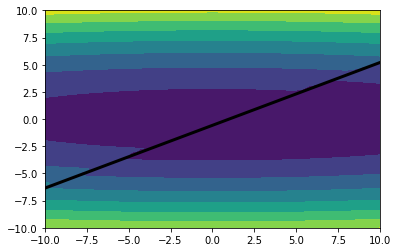

In [75]:


# slip_symbol_up([0,0.1],2)

# slip_symbol_down([0,-1.2],2)

plt.contourf(x,y,intrusion_step)
# plt.contour(x,y,r,levels=[0])
plt.plot([1-20*np.sin(np.deg2rad(60)),1+20*np.sin(np.deg2rad(60))],[-20*np.cos(np.deg2rad(60)),20*np.cos(np.deg2rad(60))],'k-',linewidth=3)
plt.xlim(-10,10)
plt.ylim(-10,10)